In [1]:
from datasets import load_dataset
from datasets import Dataset, Image
from glob import glob
from tqdm import tqdm
import linecache
import json
import mp
import os

In [2]:
files = glob('data/generated-vehicle/*.jsonl')
len(files)

1754

In [9]:
from tqdm import tqdm

def loop(files):
    files, _ = files
    results = []
    for file in files:
        index = file.split('/')[-1].replace('.jsonl', '')
        with open(file) as fopen:
            i = 0
            for l in tqdm(fopen):
                try:
                    l = json.loads(l)
                except:
                    i += 1
                    continue
                filename = os.path.join('image-vehicle', f'{index}-{i}.jpeg')
                if not os.path.exists(filename):
                    i += 1
                    continue
                    
                l.pop('image_base64', None)
                    
                l['filename'] = filename
                l['image'] = filename
                    
                results.append(l)
                
                i += 1
                
    return results

In [ ]:
r = mp.multiprocessing(files, loop, cores = 30, returned = True)

In [12]:
len(r)

778295

In [13]:
dataset = Dataset.from_list(r)
dataset = dataset.cast_column("image", Image())
dataset

Dataset({
    features: ['alt_text', 'parent_href', 'filename', 'image'],
    num_rows: 778295
})

In [14]:
dataset[0]

{'alt_text': 'Tested: 2022 Kia EV6 GT-Line AWD Is ...',
 'parent_href': '/imgres?q=2022%20Kia%20EV6%20GT-Line%20AWD&imgurl=https%3A%2F%2Fhips.hearstapps.com%2Fhmg-prod%2Fimages%2F2022-kia-ev6-gt-line-107-1647378256.jpg%3Fcrop%3D0.655xw%3A0.983xh%3B0.136xw%2C0%26resize%3D1200%3A*&imgrefurl=https%3A%2F%2Fwww.caranddriver.com%2Freviews%2Fa38710633%2F2022-kia-ev6-drive%2F&docid=-3yJW8AswoRxjM&tbnid=JgbyT4X9a9A7ZM&vet=12ahUKEwjJ36CBvMGFAxVUFFkFHcEQAtkQM3oFCIUBEAA..i&w=1179&h=1180&hcb=2&ved=2ahUKEwjJ36CBvMGFAxVUFFkFHcEQAtkQM3oFCIUBEAA',
 'filename': 'image-vehicle/327-2.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1179x1180>}

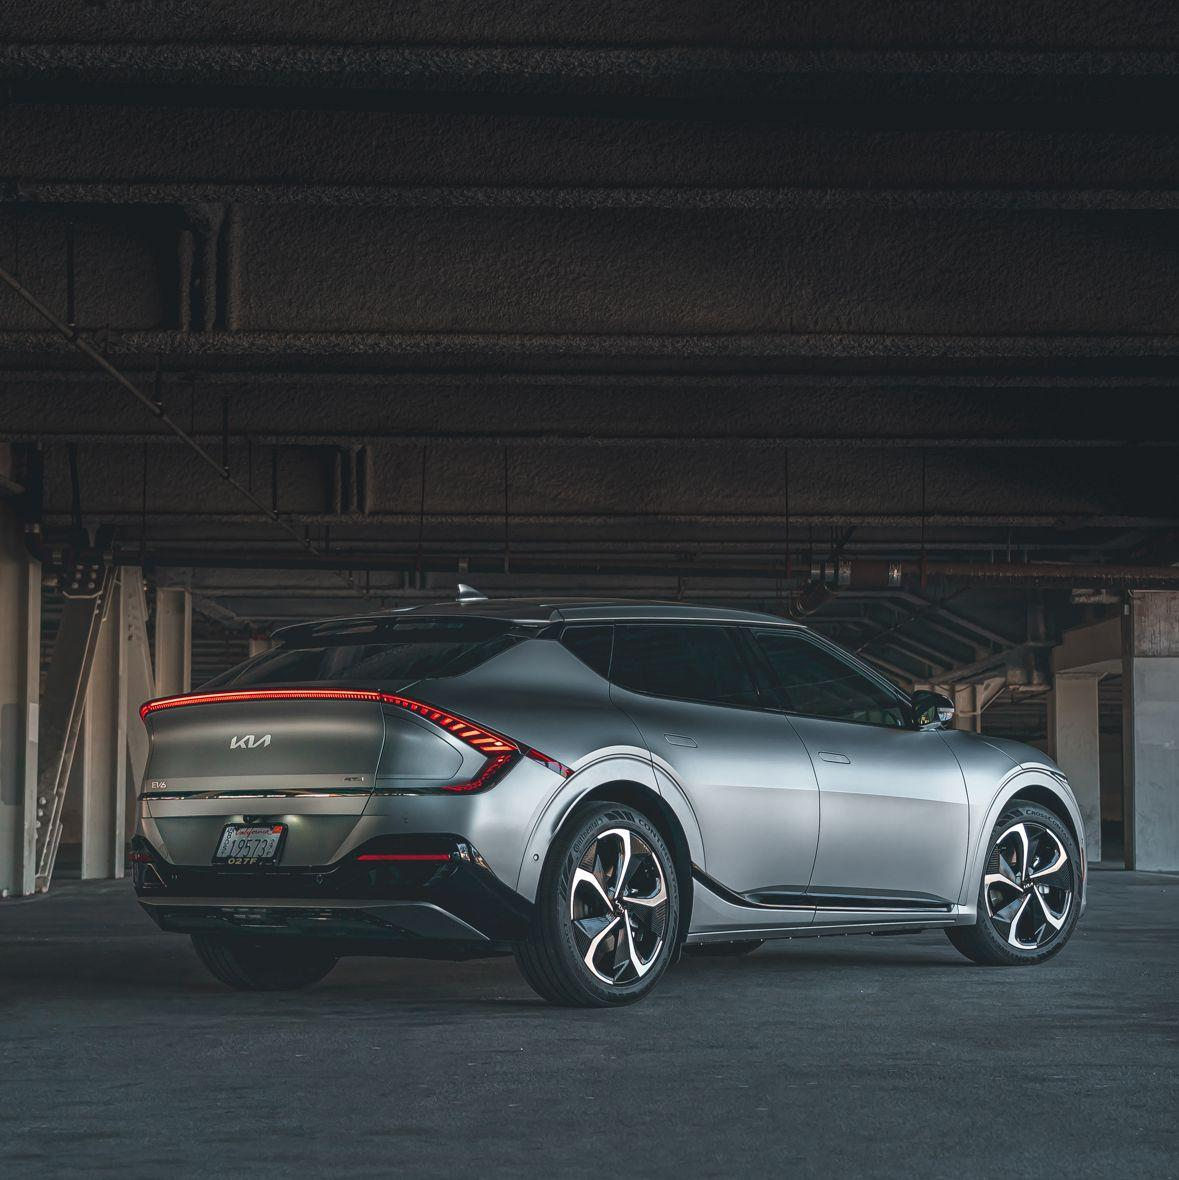

In [15]:
dataset[0]['image']

In [16]:
dataset[-1]

{'alt_text': '2018 Mercedes Benz CLA 250 ...',
 'parent_href': '/imgres?q=2018%20Mercedes-Benz%20CLA%20200%20Night%20Edition&imgurl=https%3A%2F%2Fi.ytimg.com%2Fvi%2FGZUgpiMwcaI%2Fmaxresdefault.jpg&imgrefurl=https%3A%2F%2Fm.youtube.com%2Fwatch%3Fv%3DGZUgpiMwcaI&docid=kjgUDYPbneiZBM&tbnid=ykdPdoHCxZ3AbM&vet=12ahUKEwiq1vPA9cGFAxWXEFkFHaCVAn04MhAzegQIDxAA..i&w=1280&h=720&hcb=2&ved=2ahUKEwiq1vPA9cGFAxWXEFkFHaCVAn04MhAzegQIDxAA',
 'filename': 'image-vehicle/801-563.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>}

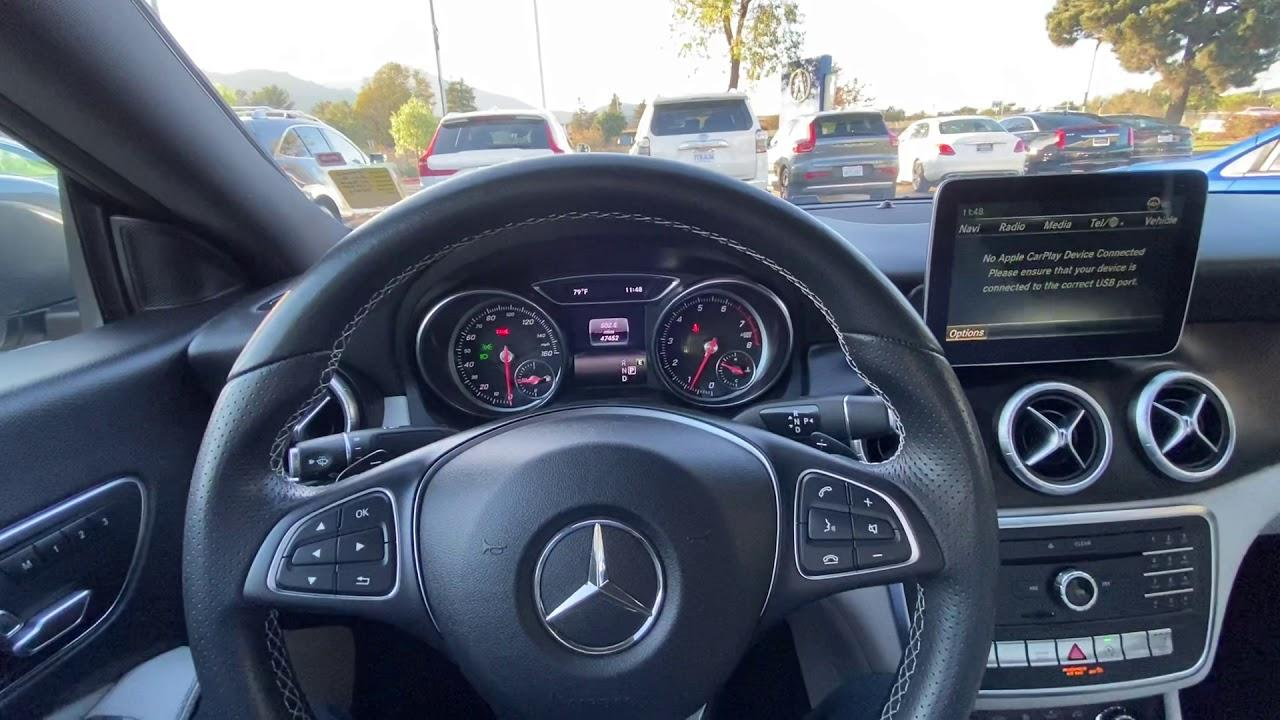

In [17]:
dataset[-1]['image']

In [18]:
dataset[10000]

{'alt_text': '2019 Subaru Crosstrek Research, photos ...',
 'parent_href': '/imgres?q=2019%20Subaru%20XV%202.0i&imgurl=https%3A%2F%2Fimg2.carmax.com%2Fassets%2F25389595%2Fhero.jpg%3Fwidth%3D400&imgrefurl=https%3A%2F%2Fwww.carmax.com%2Fresearch%2Fsubaru%2Fcrosstrek%2F2019&docid=AyqkrmH7DNHLrM&tbnid=iuyVUwKd4gf-JM&vet=12ahUKEwix-JffwMSFAxVc48kDHQnfCCA4ChAzegQIExAA..i&w=400&h=400&hcb=2&ved=2ahUKEwix-JffwMSFAxVc48kDHQnfCCA4ChAzegQIExAA',
 'filename': 'image-vehicle/1244-108.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400>}

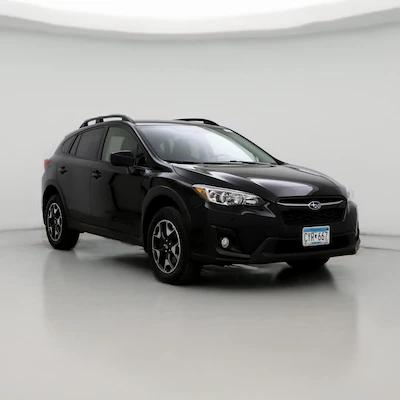

In [19]:
dataset[10000]['image']

In [22]:
import time

while True:
    try:
        dataset.push_to_hub(repo_id = 'malaysia-ai/crawl-google-image-malaysian-car')
    except Exception as e:
        print(e)
        pass
    
    time.sleep(60 * 60)